Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers


import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib


In [3]:
# ## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train")
data_dir_test = pathlib.Path('gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Test')
print(data_dir_train)

gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train


In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
  ## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

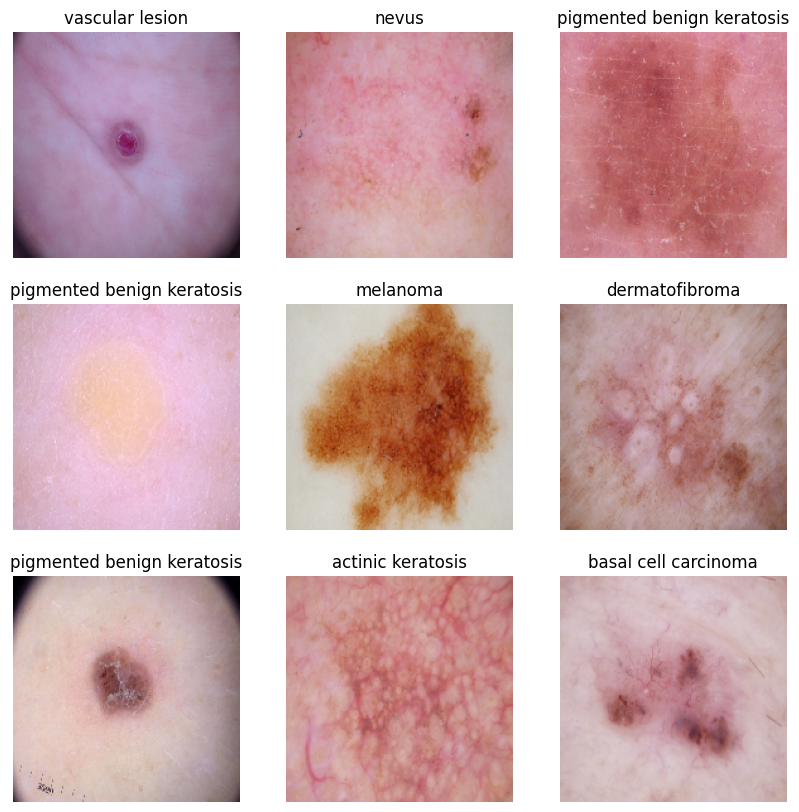

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
num_classes = 9  # Number of classes
# Convert class vectors to binary class matrices.
# x_train = tf.keras.utils.to_categorical(train_ds, num_classes)
# y_test = tf.keras.utils.to_categorical(val_ds, num_classes)

In [13]:
num_classes = len(class_names)

model = Sequential([
layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              # loss='sparse_categorical_crossentropy',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [16]:
test_ds



<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 520s 3s/step - accuracy: 0.2535 - loss: 1.9917 - val_accuracy: 0.5168 - val_loss: 1.5348
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.5177 - loss: 1.4135 - val_accuracy: 0.5190 - val_loss: 1.4549
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.5306 - loss: 1.3633 - val_accuracy: 0.4877 - val_loss: 1.4365
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5504 - loss: 1.2347 - val_accuracy: 0.5324 - val_loss: 1.4009
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5904 - loss: 1.1372 - val_accuracy: 0.5168 - val_loss: 1.3843
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5927 - loss: 1.1097 - val_accuracy: 0.5101 - val_loss: 1.4554
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5955 - loss: 1.0867 - val_accuracy: 0.5302 - val_loss: 1.4812
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.6618 - loss: 0.9496 - val_accuracy: 0.5459 - val_los

### Visualizing training results

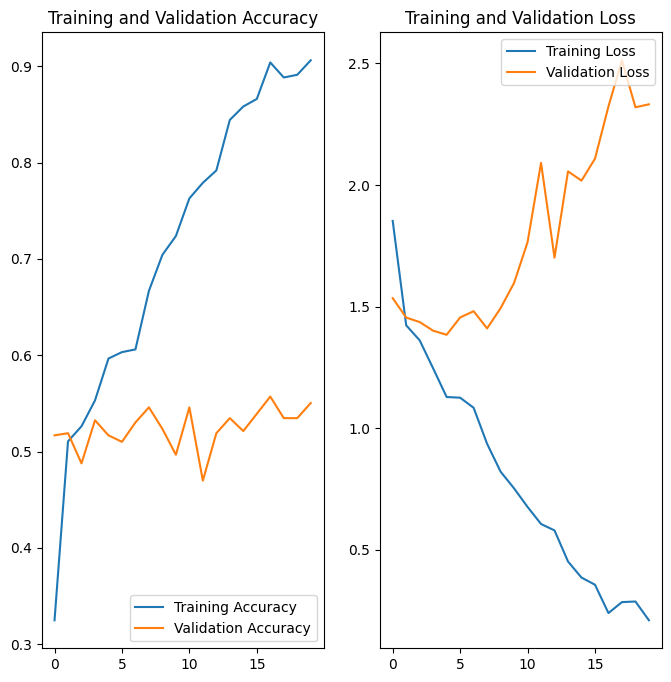

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here
#### Observations: Above model shows high accuracy for training data set compared to test dataset. There is large difference between accuracy of train and test data. <br>
#### Hence Model shows presence of overfit.


#### Vizualizing distribution of classes in training dataset


In [34]:
from glob import glob
import pandas as pd
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [35]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,gdrive/MyDrive/assignment_melanoma_CNN/Skin_Ca...,pigmented benign keratosis
1,gdrive/MyDrive/assignment_melanoma_CNN/Skin_Ca...,pigmented benign keratosis
2,gdrive/MyDrive/assignment_melanoma_CNN/Skin_Ca...,pigmented benign keratosis
3,gdrive/MyDrive/assignment_melanoma_CNN/Skin_Ca...,pigmented benign keratosis
4,gdrive/MyDrive/assignment_melanoma_CNN/Skin_Ca...,pigmented benign keratosis
...,...,...
2234,gdrive/MyDrive/assignment_melanoma_CNN/Skin_Ca...,actinic keratosis
2235,gdrive/MyDrive/assignment_melanoma_CNN/Skin_Ca...,actinic keratosis
2236,gdrive/MyDrive/assignment_melanoma_CNN/Skin_Ca...,actinic keratosis
2237,gdrive/MyDrive/assignment_melanoma_CNN/Skin_Ca...,actinic keratosis


Class=5, n=462 (20.634%)
Class=4, n=357 (15.945%)
Class=6, n=77 (3.439%)
Class=8, n=139 (6.208%)
Class=1, n=376 (16.793%)
Class=7, n=181 (8.084%)
Class=3, n=438 (19.562%)
Class=2, n=95 (4.243%)
Class=0, n=114 (5.092%)


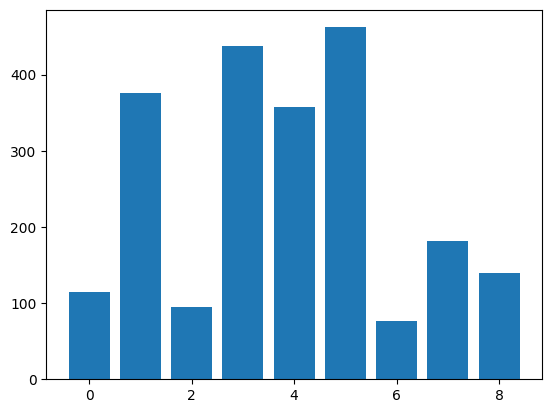

In [36]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#### Observations:
#### - Class 6 has least number of samples - 3.43%
#### - Clas 5 dominate the data in terms of proporation of samples
#### Hence dataset shows class immbalance

## Rectify the class imbalance

In [37]:
from tensorflow import keras
from tensorflow.keras import layers


# Todo, visualize how your augmentation strategy works for one instance of training image.
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.RandomCrop(img_height,img_width),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


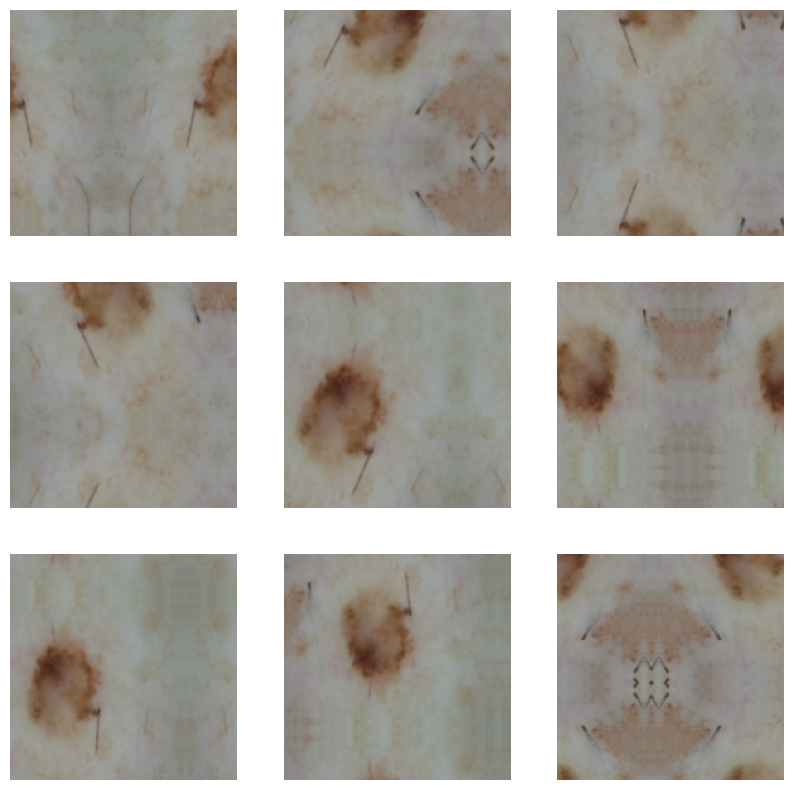

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [21]:
import os
# For convenience, let us set up the path for the training and validation sets
train_dir = os.path.join('/content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train')
val_dir = os.path.join('/content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Test')

### Data Augmentation and adding dropout layers

In [22]:
!pip install Augmentor

In [23]:
path_to_training_dataset = '/content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/'

In [24]:
# Data augmentation

path_to_training_dataset = '/content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/'
print(path_to_training_dataset)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

/content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/
Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C165CFE7E20>: 100%|██████████| 500/500 [00:40<00:00, 12.45 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C165CD1E680>: 100%|██████████| 500/500 [00:35<00:00, 14.20 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C16700F5A50>: 100%|██████████| 500/500 [00:28<00:00, 17.50 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7C166C4806A0>: 100%|██████████| 500/500 [01:58<00:00,  4.22 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C166CB9B9D0>: 100%|██████████| 500/500 [01:53<00:00,  4.40 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C170E854370>: 100%|██████████| 500/500 [00:27<00:00, 17.97 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C165CF8CA30>: 100%|██████████| 500/500 [00:55<00:00,  9.03 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C166CC35960>: 100%|██████████| 500/500 [00:29<00:00, 17.18 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C166CDA2950>: 100%|██████████| 500/500 [00:27<00:00, 17.92 Samples/s]


In [25]:
#Count images in train dir
data_dir_train = pathlib.Path("gdrive/MyDrive/assignment_melanoma_CNN/Skin_Cancer_Data/Train/")

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [26]:

# Split the data in train and test data set
# data_dir_train=path_to_training_dataset+""
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [27]:
# data_dir_train=data_dir_train.glob('*/output/*.jpg')
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [28]:
 #adding dropout layer

In [42]:
num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")

])

In [47]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model1 = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [48]:

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 20
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.1505 - loss: 2.2973 - val_accuracy: 0.2925 - val_loss: 1.9047
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.3478 - loss: 1.7750 - val_accuracy: 0.4195 - val_loss: 1.5796
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.4820 - loss: 1.3578 - val_accuracy: 0.5033 - val_loss: 1.3091
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.5522 - loss: 1.1998 - val_accuracy: 0.5657 - val_loss: 1.1712
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.6085 - loss: 1.0352 - val_accuracy: 0.6355 - val_loss: 1.0201
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.6638 - loss: 0.9088 - val_accuracy: 0.6429 - val_loss: 0.9903
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.6933 - loss: 0.8228 - val_accuracy: 0.6704 - val_loss: 0.9471
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.7574 - loss: 0.6703 - val_accu

In [49]:
model1.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 334ms/step - accuracy: 0.8998 - loss: 0.6125


[0.48264017701148987, 0.899328887462616]







































### Visualizing the results

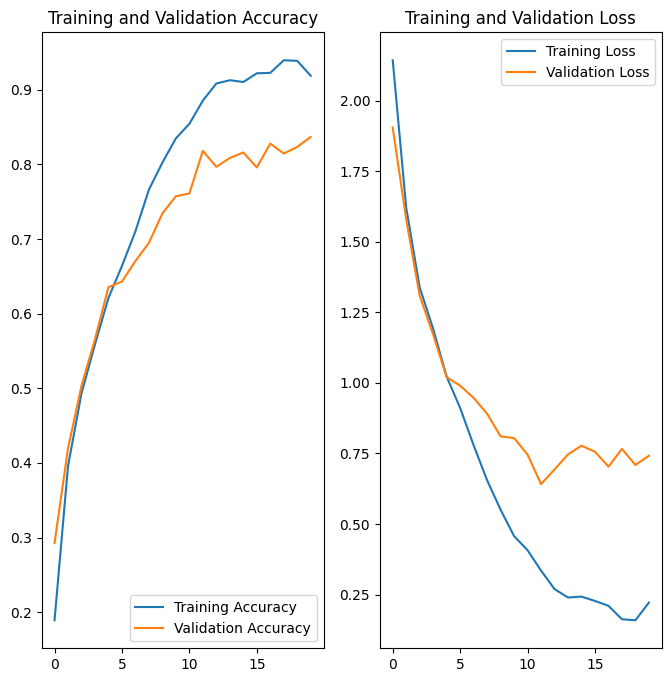

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations : Model shows improved accuracy in test score compared to previous model run.
Adding augemented data ha helped improving test accuracy as well.
